<div style="background-color: #bfd630; font-family: Calibri, sans-serif; padding: 20px;">



   <div style="text-align: center;">
      <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaJWG7PzF3toxaRMB1-JicpqMgJuEXATd0fg&" style="width: 120px; margin-top: 20px; margin-bottom: 60px;">
   </div>

   <div style="text-align: center; font-size: 24px; font-weight: bold; font-family: Calibri; color: #000000; margin-bottom: 10px;">
      Machine Learning Project | To Grant or Not to Grant
   </div>
   
   <div style="text-align: center; font-family: Calibri; font-size: 22px; color: #000000; font-weight: bold; margin-bottom: 20px;">
      4. N Stage Learning Model
   </div>

   <div style="text-align: center; font-size: 18px; font-family: Calibri; font-weight: bold; color: #333333; margin-bottom: 5px;">
      Nova Information Management School
   </div>

   <div style="text-align: center; font-size: 18px; font-family: Calibri; font-weight: bold; color: #333333; margin-bottom: 20px;">
      Universidade Nova de Lisboa
   </div>
        <div style="text-align: center; font-size: 16px; font-family: Calibri; font-weight: bold; color: #333333; margin-bottom: 10px;">
      Master in Data Science and Advanced Analytics
   </div>
 
   <div style="text-align: center;">
      <img src="https://cdn.prod.website-files.com/617accb8b04ef2b3feffa61b/6581e90d485a9976c3576a46_how-does-workers-comp-work.jpg" style="width: 350px; margin-top: 20px; margin-bottom: 60px;">
   </div>




   <div style="text-align: center; font-family: Calibri; font-size: 16px; color: #333333; font-weight: bold; margin-bottom: 20px;">
      Project Group: 32
   </div>

   <div style="text-align: center; font-family: Calibri; font-size: 16px; color: #333333; margin-bottom: 40px">
      Klimentina Gilevska -  20240747 <br>
      Maria Assunção -  20211605 <br>
      Rita Matos -  20211642 <br>
      Rita Wang -  20240551 <br>
      Sven Goerdes -  20240503 <br>
   </div>

   <div style="text-align: center; font-family: Calibri; font-size: 16px; color: #333333; margin-bottom: 10px">
      Fall/Spring Semester 2024-2025
   </div>

  <div style="text-align: center; font-family: Calibri; font-size: 16px; color: #333333; margin-bottom: 20px;">
      11th November 2024
   </div>

   
</div>

__Import libaries__

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys 
sys.path.append('../pipeline_scripts')

from n_stage_learning import *

#Scaling
from sklearn.preprocessing import MinMaxScaler

 #Correlation Heatmap
from matplotlib.colors import LinearSegmentedColormap

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge

import xgboost as xgb

# Model Evaluation
from sklearn.metrics import confusion_matrix

# Imbalance Data Handling
from imblearn.combine import SMOTETomek 
pd.set_option('display.max_columns', None)


sys.path.append('../helper_functions')
from helper_functions import *



__Read in Data__

In [65]:
# Read in the data
X_val_encoded = pd.read_csv('../project_data/X_val_encoded.csv', delimiter=',', index_col=0)
X_train_encoded = pd.read_csv('../project_data/X_train_encoded.csv', delimiter=',', index_col=0)

y_train = pd.read_csv('../project_data/y_train.csv',delimiter=',', index_col=0)
y_val= pd.read_csv('../project_data/y_val.csv', delimiter=',', index_col=0)

X_test_encoded = pd.read_csv('../project_data/X_test_encoded.csv',index_col=0)

In [ ]:
missing_data(X_train_encoded)

In [68]:
# # drop 'Days_between_C-2 Date_Accident Date_log' for now 
X_train_encoded.drop(columns=['Days_between_C-2 Date_Accident Date_log'], inplace=True)
X_val_encoded.drop(columns=['Days_between_C-2 Date_Accident Date_log'], inplace=True)
X_test_encoded.drop(columns=['Days_between_C-2 Date_Accident Date_log'], inplace=True)

In [69]:
X_train_encoded.head()

,Age at Injury,IME-4 Count,Number of Dependents,Alternative Dispute Resolution_binary,COVID-19 Indicator_binary,Attorney/Representative_binary,Industry Code_encoded_5. PPD SCH LOSS,Industry Code_encoded_2. NON-COMP,Industry Code_encoded_3. MED ONLY,Industry Code_encoded_4. TEMPORARY,Industry Code_encoded_1. CANCELLED,Industry Code_encoded_8. DEATH,Industry Code_encoded_6. PPD NSL,Industry Code_encoded_7. PTD,WCIO Cause of Injury Code_encoded_5. PPD SCH LOSS,WCIO Cause of Injury Code_encoded_2. NON-COMP,WCIO Cause of Injury Code_encoded_3. MED ONLY,WCIO Cause of Injury Code_encoded_4. TEMPORARY,WCIO Cause of Injury Code_encoded_1. CANCELLED,WCIO Cause of Injury Code_encoded_8. DEATH,WCIO Cause of Injury Code_encoded_6. PPD NSL,WCIO Cause of Injury Code_encoded_7. PTD,WCIO Nature of Injury Code_encoded_5. PPD SCH LOSS,WCIO Nature of Injury Code_encoded_2. NON-COMP,WCIO Nature of Injury Code_encoded_3. MED ONLY,WCIO Nature of Injury Code_encoded_4. TEMPORARY,WCIO Nature of Injury Code_encoded_1. CANCELLED,WCIO Nature of Injury Code_encoded_8. DEATH,WCIO Nature of Injury Code_encoded_6. PPD NSL,WCIO Nature of Injury Code_encoded_7. PTD,WCIO Part Of Body Code_encoded_5. PPD SCH LOSS,WCIO Part Of Body Code_encoded_2. NON-COMP,WCIO Part Of Body Code_encoded_3. MED ONLY,WCIO Part Of Body Code_encoded_4. TEMPORARY,WCIO Part Of Body Code_encoded_1. CANCELLED,WCIO Part Of Body Code_encoded_8. DEATH,WCIO Part Of Body Code_encoded_6. PPD NSL,WCIO Part Of Body Code_encoded_7. PTD,Carrier Type_Self-insured Private Entity,Carrier Type_Self-insured Public Entity,Carrier Type_Special Funds,Carrier Type_State Insurance Fund,C-3 Date_nabinary,Average Weekly Wage_nabinary,First Hearing Date_nabinary,Accident Datemonth,Accident Date_Season_Spring,Accident Date_Season_Summer,Accident Date_Season_Winter,Days_between_Assembly Date_Accident Date_log,Average Weekly Wage_Imputed_log,Age Group
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5506797,36.0,0.0,4.0,0,0,1,0.203937,0.414533,0.136249,0.218004,0.017940,0.000781,0.008373,0.000184,0.260941,0.340657,0.115126,0.259670,0.011077,0.001090,0.011440,0.000000,0.120186,0.543563,0.125766,0.195438,0.008246,0.000039,0.006672,0.000091,0.103556,0.398552,0.153580,0.317115,0.014393,0.001192,0.011568,0.000044,0.0,1.0,0.0,0.0,0,1,0,3,1.0,0.0,0.0,4.644391,7.472609,Middle-Age
5481216,48.0,0.0,5.0,0,1,0,0.051016,0.544796,0.108867,0.269247,0.016311,0.000620,0.008943,0.000198,0.000404,0.664818,0.084012,0.232334,0.010343,0.006298,0.001213,0.000578,0.000337,0.668521,0.082196,0.230856,0.010225,0.006068,0.001236,0.000562,0.000413,0.673888,0.060766,0.243991,0.011142,0.007531,0.001341,0.000929,0.0,0.0,0.0,1.0,0,1,0,3,1.0,0.0,0.0,4.127134,0.693147,Middle-Age
5520188,40.0,1.0,6.0,0,0,1,0.051016,0.544796,0.108867,0.269247,0.016311,0.000620,0.008943,0.000198,0.078993,0.550985,0.129650,0.227110,0.004009,0.000039,0.009098,0.000116,0.120186,0.543563,0.125766,0.195438,0.008246,0.000039,0.006672,0.000091,0.163491,0.407165,0.126255,0.289085,0.009226,0.000030,0.004718,0.000030,0.0,0.0,0.0,1.0,0,0,1,7,0.0,1.0,0.0,2.484907,6.933579,Middle-Age
5748412,54.0,0.0,1.0,0,0,1,0.091220,0.369806,0.133349,0.367613,0.023276,0.001308,0.013312,0.000115,0.078425,0.427921,0.129190,0.341686,0.010413,0.000000,0.011715,0.000651,0.092965,0.428047,0.136441,0.320823,0.009994,0.000047,0.011551,0.000132,0.017891,0.628283,0.124477,0.216787,0.005139,0.001903,0.005329,0.000190,0.0,1.0,0.0,0.0,0,0,1,6,0.0,1.0,0.0,1.386294,7.120865,Older
5653867,40.0,0.0,0.0,0,0,0,0.045137,0.639984,0.101387,0.193792,0.015013,0.000492,0.004065,0.000131,0.077028,0.423143,0.131206,0.346673,0.008786,0.000031,0.012947,0.000186,0.092965,0.428047,0.136441,0.320823,0.009994,0.000047,0.011551,0.000132,0.160321,0.455288,0.115974,0.256309,0.009044,0.000000,0.003063,0.000000,1.0,0.0,0.0,0.0,1,0,1,2,0.0,0.0,1.0,1.791759,6.734818,Middle-Age


In [70]:
# show first line for every dataset with displya and head
# X values 
display(X_train_encoded.head(1))
display(X_val_encoded.head(1))
display(X_test_encoded.head(1))

# y values 
display(y_train.head(1))
display(y_val.head(1))

,Age at Injury,IME-4 Count,Number of Dependents,Alternative Dispute Resolution_binary,COVID-19 Indicator_binary,Attorney/Representative_binary,Industry Code_encoded_5. PPD SCH LOSS,Industry Code_encoded_2. NON-COMP,Industry Code_encoded_3. MED ONLY,Industry Code_encoded_4. TEMPORARY,Industry Code_encoded_1. CANCELLED,Industry Code_encoded_8. DEATH,Industry Code_encoded_6. PPD NSL,Industry Code_encoded_7. PTD,WCIO Cause of Injury Code_encoded_5. PPD SCH LOSS,WCIO Cause of Injury Code_encoded_2. NON-COMP,WCIO Cause of Injury Code_encoded_3. MED ONLY,WCIO Cause of Injury Code_encoded_4. TEMPORARY,WCIO Cause of Injury Code_encoded_1. CANCELLED,WCIO Cause of Injury Code_encoded_8. DEATH,WCIO Cause of Injury Code_encoded_6. PPD NSL,WCIO Cause of Injury Code_encoded_7. PTD,WCIO Nature of Injury Code_encoded_5. PPD SCH LOSS,WCIO Nature of Injury Code_encoded_2. NON-COMP,WCIO Nature of Injury Code_encoded_3. MED ONLY,WCIO Nature of Injury Code_encoded_4. TEMPORARY,WCIO Nature of Injury Code_encoded_1. CANCELLED,WCIO Nature of Injury Code_encoded_8. DEATH,WCIO Nature of Injury Code_encoded_6. PPD NSL,WCIO Nature of Injury Code_encoded_7. PTD,WCIO Part Of Body Code_encoded_5. PPD SCH LOSS,WCIO Part Of Body Code_encoded_2. NON-COMP,WCIO Part Of Body Code_encoded_3. MED ONLY,WCIO Part Of Body Code_encoded_4. TEMPORARY,WCIO Part Of Body Code_encoded_1. CANCELLED,WCIO Part Of Body Code_encoded_8. DEATH,WCIO Part Of Body Code_encoded_6. PPD NSL,WCIO Part Of Body Code_encoded_7. PTD,Carrier Type_Self-insured Private Entity,Carrier Type_Self-insured Public Entity,Carrier Type_Special Funds,Carrier Type_State Insurance Fund,C-3 Date_nabinary,Average Weekly Wage_nabinary,First Hearing Date_nabinary,Accident Datemonth,Accident Date_Season_Spring,Accident Date_Season_Summer,Accident Date_Season_Winter,Days_between_Assembly Date_Accident Date_log,Average Weekly Wage_Imputed_log,Age Group
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5506797,36.0,0.0,4.0,0,0,1,0.203937,0.414533,0.136249,0.218004,0.01794,0.000781,0.008373,0.000184,0.260941,0.340657,0.115126,0.25967,0.011077,0.00109,0.01144,0.0,0.120186,0.543563,0.125766,0.195438,0.008246,0.000039,0.006672,0.000091,0.103556,0.398552,0.15358,0.317115,0.014393,0.001192,0.011568,0.000044,0.0,1.0,0.0,0.0,0,1,0,3,1.0,0.0,0.0,4.644391,7.472609,Middle-Age


,Age at Injury,IME-4 Count,Number of Dependents,Alternative Dispute Resolution_binary,COVID-19 Indicator_binary,Attorney/Representative_binary,Industry Code_encoded_5. PPD SCH LOSS,Industry Code_encoded_2. NON-COMP,Industry Code_encoded_3. MED ONLY,Industry Code_encoded_4. TEMPORARY,Industry Code_encoded_1. CANCELLED,Industry Code_encoded_8. DEATH,Industry Code_encoded_6. PPD NSL,Industry Code_encoded_7. PTD,WCIO Cause of Injury Code_encoded_5. PPD SCH LOSS,WCIO Cause of Injury Code_encoded_2. NON-COMP,WCIO Cause of Injury Code_encoded_3. MED ONLY,WCIO Cause of Injury Code_encoded_4. TEMPORARY,WCIO Cause of Injury Code_encoded_1. CANCELLED,WCIO Cause of Injury Code_encoded_8. DEATH,WCIO Cause of Injury Code_encoded_6. PPD NSL,WCIO Cause of Injury Code_encoded_7. PTD,WCIO Nature of Injury Code_encoded_5. PPD SCH LOSS,WCIO Nature of Injury Code_encoded_2. NON-COMP,WCIO Nature of Injury Code_encoded_3. MED ONLY,WCIO Nature of Injury Code_encoded_4. TEMPORARY,WCIO Nature of Injury Code_encoded_1. CANCELLED,WCIO Nature of Injury Code_encoded_8. DEATH,WCIO Nature of Injury Code_encoded_6. PPD NSL,WCIO Nature of Injury Code_encoded_7. PTD,WCIO Part Of Body Code_encoded_5. PPD SCH LOSS,WCIO Part Of Body Code_encoded_2. NON-COMP,WCIO Part Of Body Code_encoded_3. MED ONLY,WCIO Part Of Body Code_encoded_4. TEMPORARY,WCIO Part Of Body Code_encoded_1. CANCELLED,WCIO Part Of Body Code_encoded_8. DEATH,WCIO Part Of Body Code_encoded_6. PPD NSL,WCIO Part Of Body Code_encoded_7. PTD,Carrier Type_Self-insured Private Entity,Carrier Type_Self-insured Public Entity,Carrier Type_Special Funds,Carrier Type_State Insurance Fund,C-3 Date_nabinary,Average Weekly Wage_nabinary,First Hearing Date_nabinary,Accident Datemonth,Accident Date_Season_Spring,Accident Date_Season_Summer,Accident Date_Season_Winter,Days_between_Assembly Date_Accident Date_log,Average Weekly Wage_Imputed_log,Age Group
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5749872,56.0,0.0,6.0,0,0,0,0.203937,0.414533,0.136249,0.218004,0.01794,0.000781,0.008373,0.000184,0.089476,0.461166,0.136808,0.297777,0.006077,0.0,0.008597,0.000099,0.074612,0.539974,0.104376,0.251113,0.018412,0.002848,0.008544,0.00012,0.163491,0.407165,0.126255,0.289085,0.009226,0.00003,0.004718,0.00003,0.0,1.0,0.0,0.0,1,1,1,2,0.0,0.0,1.0,4.844187,0.693147,Older


,Age at Injury,IME-4 Count,Number of Dependents,Alternative Dispute Resolution_binary,COVID-19 Indicator_binary,Attorney/Representative_binary,Industry Code_encoded_5. PPD SCH LOSS,Industry Code_encoded_2. NON-COMP,Industry Code_encoded_3. MED ONLY,Industry Code_encoded_4. TEMPORARY,Industry Code_encoded_1. CANCELLED,Industry Code_encoded_8. DEATH,Industry Code_encoded_6. PPD NSL,Industry Code_encoded_7. PTD,WCIO Cause of Injury Code_encoded_5. PPD SCH LOSS,WCIO Cause of Injury Code_encoded_2. NON-COMP,WCIO Cause of Injury Code_encoded_3. MED ONLY,WCIO Cause of Injury Code_encoded_4. TEMPORARY,WCIO Cause of Injury Code_encoded_1. CANCELLED,WCIO Cause of Injury Code_encoded_8. DEATH,WCIO Cause of Injury Code_encoded_6. PPD NSL,WCIO Cause of Injury Code_encoded_7. PTD,WCIO Nature of Injury Code_encoded_5. PPD SCH LOSS,WCIO Nature of Injury Code_encoded_2. NON-COMP,WCIO Nature of Injury Code_encoded_3. MED ONLY,WCIO Nature of Injury Code_encoded_4. TEMPORARY,WCIO Nature of Injury Code_encoded_1. CANCELLED,WCIO Nature of Injury Code_encoded_8. DEATH,WCIO Nature of Injury Code_encoded_6. PPD NSL,WCIO Nature of Injury Code_encoded_7. PTD,WCIO Part Of Body Code_encoded_5. PPD SCH LOSS,WCIO Part Of Body Code_encoded_2. NON-COMP,WCIO Part Of Body Code_encoded_3. MED ONLY,WCIO Part Of Body Code_encoded_4. TEMPORARY,WCIO Part Of Body Code_encoded_1. CANCELLED,WCIO Part Of Body Code_encoded_8. DEATH,WCIO Part Of Body Code_encoded_6. PPD NSL,WCIO Part Of Body Code_encoded_7. PTD,Carrier Type_Self-insured Private Entity,Carrier Type_Self-insured Public Entity,Carrier Type_Special Funds,Carrier Type_State Insurance Fund,C-3 Date_nabinary,Average Weekly Wage_nabinary,First Hearing Date_nabinary,Accident Datemonth,Accident Date_Season_Spring,Accident Date_Season_Summer,Accident Date_Season_Winter,Days_between_Assembly Date_Accident Date_log,Average Weekly Wage_Imputed_log,Age Group
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6165911,19.0,0.0,1,0,0,0,0.09122,0.369806,0.133349,0.367613,0.023276,0.001308,0.013312,0.000115,0.10405,0.436156,0.128415,0.312378,0.008546,0.000455,0.009819,0.000182,0.120186,0.543563,0.125766,0.195438,0.008246,0.000039,0.006672,0.000091,0.080782,0.550535,0.120737,0.236993,0.006721,0.000373,0.003859,0.0,0.0,0.0,0.0,0.0,1,1,1,12,0.0,0.0,1.0,2.397895,7.472609,Young Workforce


,Claim Injury Type
Claim Identifier,
5506797,5. PPD SCH LOSS


,Claim Injury Type
Claim Identifier,
5749872,2. NON-COMP


In [53]:
display(y_train.value_counts(normalize= True))
display(y_val.value_counts(normalize= True))

Claim Injury Type
2. NON-COMP          0.510595
4. TEMPORARY         0.255599
3. MED ONLY          0.120150
5. PPD SCH LOSS      0.084608
1. CANCELLED         0.020679
6. PPD NSL           0.007382
8. DEATH             0.000818
7. PTD               0.000169
Name: proportion, dtype: float64

Claim Injury Type
2. NON-COMP          0.507079
4. TEMPORARY         0.258717
3. MED ONLY          0.120046
5. PPD SCH LOSS      0.084111
1. CANCELLED         0.021725
6. PPD NSL           0.007334
8. DEATH             0.000819
7. PTD               0.000168
Name: proportion, dtype: float64

### Binary Splitting 
> Splitting into majority and minority class

In [54]:
# get a list of all target values 
all_target_values = list(y_train['Claim Injury Type'].unique())


# all_features
binary_list = [['2. NON-COMP'], ['4. TEMPORARY'], ['3. MED ONLY']]

# imported from two_stage_learning.py
# create a list of tuples where the first elemnt is the target value that takes on binary = 1  and the second element are the target values that take on binary = 0
model_split_list = model_split(binary_list, all_target_values)
model_split_list

[(['2. NON-COMP'],
  ['5. PPD SCH LOSS',
   '3. MED ONLY',
   '4. TEMPORARY',
   '1. CANCELLED',
   '8. DEATH',
   '6. PPD NSL',
   '7. PTD']),
 (['4. TEMPORARY'],
  ['5. PPD SCH LOSS',
   '3. MED ONLY',
   '1. CANCELLED',
   '8. DEATH',
   '6. PPD NSL',
   '7. PTD']),
 (['3. MED ONLY'],
  ['5. PPD SCH LOSS', '1. CANCELLED', '8. DEATH', '6. PPD NSL', '7. PTD'])]

In [55]:
# create a model parameter dictionary and train the models for each split with n_stage_learning_model function

model_param = {
    'n_estimators': 500,
    'learning_rate': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'random_state': 42,
    'n_jobs': -1
}
# imported from two_stage_learning.py | returns a dictionary of models that have been trained on the data for each split 
model_dict = n_stage_learning_model(model_split_list, X_train_encoded, y_train, X_val_encoded, y_val, model = 'XGBoost', **model_param)

1/ 3 Iteration
2/ 3 Iteration
3/ 3 Iteration


In [34]:
# defining the minority classes
min_class_list = ['1. CANCELLED', '5. PPD SCH LOSS', '6. PPD NSL', '7. PTD', '8. DEATH']

min_class_list = ['2. NON-COMP'] 

binary_splitting(y_val, min_class_list, 'Claim Injury Type' )
y_val['minority_class_node_1'] = binary_splitting(y_val, min_class_list, 'Claim Injury Type')
# y_train['minority_class'] = binary_splitting(y_train, min_class_list, 'Claim Injury Type')

> Apply the function and create new split 

# Test out SMOTETomke

In [35]:
# create of the target that we want to encode as 1
binary_list = ['3. MED ONLY']

# other target values
all_target_values = ['5. PPD SCH LOSS', '2. NON-COMP', '4. TEMPORARY',
       '1. CANCELLED', '8. DEATH', '6. PPD NSL', '7. PTD']


# add a binary column to the target dataframe with filter_target function
y_bin_train = filter_target(y_train, binary_list, all_target_values)
y_bin_val = filter_target(y_val, binary_list, all_target_values)


In [39]:
X_train_encoded[X_train_encoded.isna().any(axis=1)]

,Age at Injury,IME-4 Count,Number of Dependents,Alternative Dispute Resolution_binary,COVID-19 Indicator_binary,Attorney/Representative_binary,Industry Code_encoded_0,Industry Code_encoded_1,WCIO Cause of Injury Code_encoded_0,WCIO Cause of Injury Code_encoded_1,WCIO Nature of Injury Code_encoded_0,WCIO Nature of Injury Code_encoded_1,WCIO Part Of Body Code_encoded_0,WCIO Part Of Body Code_encoded_1,Industry Code_freq,WCIO Cause of Injury Code_freq,WCIO Nature of Injury Code_freq,WCIO Part Of Body Code_freq,Carrier Type_freq,Carrier Name_freq,Carrier Type_Self-insured Private Entity,Carrier Type_Self-insured Public Entity,Carrier Type_Special Funds,Carrier Type_State Insurance Fund,C-3 Date_nabinary,Average Weekly Wage_nabinary,First Hearing Date_nabinary,Accident Datemonth,Accident Date_Season_Spring,Accident Date_Season_Summer,Accident Date_Season_Winter,Days_between_Assembly Date_Accident Date_log,Days_between_C-2 Date_Accident Date_log,Average Weekly Wage Imputed_log,Accident Date_Season_Spring.1,Accident Date_Season_Summer.1,Accident Date_Season_Winter.1,Accident Date_Season_Spring.2,Accident Date_Season_Summer.2,Accident Date_Season_Winter.2
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5767580,58.0,0.0,2.0,1,0,0,0.347274,0.652726,0.478924,0.521076,0.478924,0.521076,0.478924,0.521076,7006,9632,9632,9632,36531,1566,1.0,0.0,0.0,0.0,1,1,1,7,0.0,1.0,0.0,2.772589,NaN,0.693147,0.0,1.0,0.0,0.0,1.0,0.0
6128112,55.0,0.0,0.0,0,0,1,0.455123,0.544877,0.478924,0.521076,0.478924,0.521076,0.478924,0.521076,80653,9632,9632,9632,196754,247,0.0,0.0,0.0,0.0,0,1,0,8,0.0,1.0,0.0,4.382027,NaN,7.472609,0.0,1.0,0.0,0.0,1.0,0.0
5666711,41.0,0.0,3.0,0,0,0,0.420936,0.579064,0.478924,0.521076,0.478924,0.521076,0.478924,0.521076,12667,9632,9632,9632,196754,780,0.0,0.0,0.0,0.0,1,1,1,12,0.0,0.0,1.0,4.369448,NaN,0.693147,0.0,0.0,1.0,0.0,0.0,1.0
5931006,37.0,0.0,6.0,0,0,1,0.519040,0.480960,0.478924,0.521076,0.478924,0.521076,0.478924,0.521076,6460,9632,9632,9632,85080,573,0.0,1.0,0.0,0.0,0,1,1,1,0.0,0.0,1.0,6.006353,NaN,0.693147,0.0,0.0,1.0,0.0,0.0,1.0
5519535,42.0,0.0,3.0,0,0,0,0.635983,0.364017,0.478924,0.521076,0.478924,0.521076,0.478924,0.521076,21716,9632,9632,9632,196754,133,0.0,0.0,0.0,0.0,1,1,1,6,0.0,1.0,0.0,3.135494,NaN,0.693147,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617093,40.0,0.0,0.0,1,0,0,0.455123,0.544877,0.478924,0.521076,0.478924,0.521076,0.478924,0.521076,80653,9632,9632,9632,36531,1566,1.0,0.0,0.0,0.0,1,1,1,11,0.0,0.0,0.0,3.737670,NaN,0.693147,0.0,0.0,0.0,0.0,0.0,0.0
5970154,24.0,0.0,6.0,0,0,0,0.439016,0.560984,0.478924,0.521076,0.478924,0.521076,0.478924,0.521076,5649,9632,9632,9632,36531,5090,1.0,0.0,0.0,0.0,1,1,1,1,0.0,0.0,1.0,4.564348,NaN,0.693147,0.0,0.0,1.0,0.0,0.0,1.0
5875126,40.0,0.0,4.0,0,0,0,0.574582,0.425418,0.478924,0.521076,0.478924,0.521076,0.478924,0.521076,1676,9632,9632,9632,677,165,0.0,0.0,1.0,0.0,1,1,1,11,0.0,0.0,0.0,2.564949,NaN,0.693147,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# create a smote instance
smt = SMOTETomek(sampling_strategy='auto', random_state=42)

# fit the smote instance to the data on the binary date for 3. MED ONLY
smtd = smt.fit_resample(X_train_encoded, y_bin_train['binary_target'])

# create a dataframe out of the target values 
y_smtd = smtd[1].to_frame()
# create a dataframe out of the feature values
X_train_smtd = smtd[0]

# display the first line of the target values
display(y_smtd.head(1))
display(X_train_smtd.head(1))

ValueError: Input X contains NaN.
SMOTETomek does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [75]:
model = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    random_state=42,
    n_jobs=-1
)


model.fit(X_train_smtd, y_smtd)

pred_smtd = model.predict(X_val_encoded)

pred_proba_smtd = model.predict_proba(X_val_encoded)


In [70]:
pred_smtd_val = model.predict(X_val_encoded)
pred_smtd_train = model.predict(X_train_smtd)

In [77]:
for i in np.arange(0.1, 1, 0.1):
    pred_smtd_val = np.where(pred_proba_smtd[:,1] > i, 1, 0)
    print(f'Threshold: {i}')
    print(classification_report(y_val['minority_class_node_1'], pred_smtd_val))
    print('')

Threshold: 0.1
              precision    recall  f1-score   support

           0       0.46      0.49      0.48     84881
           1       0.47      0.44      0.46     87319

    accuracy                           0.47    172200
   macro avg       0.47      0.47      0.47    172200
weighted avg       0.47      0.47      0.47    172200


Threshold: 0.2
              precision    recall  f1-score   support

           0       0.46      0.81      0.59     84881
           1       0.32      0.09      0.14     87319

    accuracy                           0.44    172200
   macro avg       0.39      0.45      0.36    172200
weighted avg       0.39      0.44      0.36    172200


Threshold: 0.30000000000000004
              precision    recall  f1-score   support

           0       0.48      0.92      0.63     84881
           1       0.22      0.02      0.04     87319

    accuracy                           0.46    172200
   macro avg       0.35      0.47      0.33    172200
weighted av

In [73]:
print('Training Data Classification Report:') 
print(classification_report(y_smtd['binary_target'], pred_smtd_train), '\n')

print('Validation Data Classification Report:') 
print(classification_report(y_bin_val['binary_target'], pred_smtd))

# print accrucay, precision, recall, f1 score

# as we can see the model is completely overfitting the data.



Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94    330440
           1       1.00      0.88      0.93    330440

    accuracy                           0.94    660880
   macro avg       0.94      0.94      0.94    660880
weighted avg       0.94      0.94      0.94    660880
 

Validation Data Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.94    151528
           1       0.52      0.05      0.09     20672

    accuracy                           0.88    172200
   macro avg       0.70      0.52      0.51    172200
weighted avg       0.84      0.88      0.83    172200



In [ ]:
binary_splitting()

In [15]:
filter_target(y_train, ['3. MED ONLY'], ['5. PPD SCH LOSS', '2. NON-COMP', '3. MED ONLY'])

,Claim Injury Type,binary_target
Claim Identifier,,
5506797,5. PPD SCH LOSS,0
5481216,2. NON-COMP,0
5520188,5. PPD SCH LOSS,0
5748412,3. MED ONLY,1
6063732,2. NON-COMP,0
...,...,...
5656674,2. NON-COMP,0
5930802,2. NON-COMP,0
5757476,2. NON-COMP,0


## Two Stage Learning 
> * Splitting the problem into two subproblems
> * Creating Binary Problems through treating several categories as one


In [17]:
# create me a basic logistic regression model
def logistic_regression(X_train, y_train):
    """
    This function takes in the training and validation sets and returns a logistic regression model
    
    Args:
        X_train: The training set
        y_train: The training set labels
        
    Returns:
        model: A logistic regression model
    """
    
    model = LogisticRegression(max_iter=3000)
    model.fit(X_train, y_train)
    
    return model


# log_model = logistic_regression(X_train_encoded, y_train['minority_class']) 

In [18]:
y_train['minority_class'] = binary_splitting(y_train, minority_class_list= ['2. NON-COMP'], split_col = 'Claim Injury Type')
y_val['minority_class'] = binary_splitting(y_val, minority_class_list= ['2. NON-COMP'], split_col = 'Claim Injury Type')

In [19]:
y_train['Claim Injury Type'].values

array(['5. PPD SCH LOSS', '2. NON-COMP', '5. PPD SCH LOSS', ...,
       '2. NON-COMP', '2. NON-COMP', '1. CANCELLED'], dtype=object)

In [20]:
y_train

# apply one hot encoding on Claim Injury Type
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoder.fit_transform(y_train['Claim Injury Type'].values.reshape(-1, 1))

# add it to y_train
y_train_encoded = pd.DataFrame(encoder.fit_transform(y_train['Claim Injury Type'].values.reshape(-1, 1)), columns = encoder.get_feature_names_out())

# add it to y_val
y_val_encoded = pd.DataFrame(encoder.transform(y_val['Claim Injury Type'].values.reshape(-1, 1)), columns = encoder.get_feature_names_out())
y_train_encoded.set_index(y_train.index, inplace=True)
y_train_encoded['Claim Injury Type'] = y_train['Claim Injury Type'].copy()
y_train_encoded



In [22]:
balanced_df_list = balanced_bagging(X_train_encoded, y_train_encoded, target_column=['x0_6. PPD NSL'], rel_size_bagg_min = 0.6,  minority_class = 1, num_bags= 40)
balanced_df_list[0][1]

,x0_1. CANCELLED,x0_2. NON-COMP,x0_3. MED ONLY,x0_4. TEMPORARY,x0_5. PPD SCH LOSS,x0_6. PPD NSL,x0_7. PTD,x0_8. DEATH,Claim Injury Type
Claim Identifier,,,,,,,,,
5545017,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4. TEMPORARY
6000300,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4. TEMPORARY
6111330,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3. MED ONLY
6135370,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4. TEMPORARY
5537228,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2. NON-COMP
...,...,...,...,...,...,...,...,...,...
6102017,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4. TEMPORARY
6046452,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4. TEMPORARY
5620667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2. NON-COMP


In [25]:
y_train

,Claim Injury Type,minority_class
Claim Identifier,,
5506797,5. PPD SCH LOSS,0
5481216,2. NON-COMP,1
5520188,5. PPD SCH LOSS,0
5748412,3. MED ONLY,0
5653867,4. TEMPORARY,0
...,...,...
5930802,2. NON-COMP,1
5757476,2. NON-COMP,1
5988322,2. NON-COMP,1


In [29]:
from sklearn import set_config
# output of the model evaluation function is throwing an error becasue it cant compile the html therefore I changed the set_config to text
set_config(display="text")

In [30]:
print("Creating model pipeline...")
# Create and train the model
model_xgb  =  xgb.XGBClassifier(
        n_estimators = 500,
        learning_rate = 0.05,
        max_depth = 6,
        min_child_weight=1,
        gamma=0,
        subsample = 0.8,
        colsample_bytree = 0.8,
        # num_class = 2,
        objective = 'binary:logistic',
        random_state = 42,
        n_jobs = -1
    )

print("Training the model...")
model_xgb.fit(X_train_encoded, y_train['minority_class'])

Creating model pipeline...
Training the model...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [31]:
# change option back to diagram
set_config(display="diagram")

In [32]:
y_val

,Claim Injury Type,minority_class_node_1,minority_class
Claim Identifier,,,
5749872,2. NON-COMP,1,1
5454703,2. NON-COMP,1,1
6092487,3. MED ONLY,0,0
5508849,2. NON-COMP,1,1
6018090,2. NON-COMP,1,1
...,...,...,...
5627750,2. NON-COMP,1,1
5688230,2. NON-COMP,1,1
5656444,3. MED ONLY,0,0


In [33]:
print(model_evaluation(model_xgb, X_val_encoded, y_val['minority_class'])[4])
print(accuracy_score(y_train['minority_class'], model_xgb.predict(X_train_encoded)))

print(model_evaluation(model_xgb, X_val_encoded, y_val['minority_class'])[4])
print(accuracy_score(y_val['minority_class'], model_xgb.predict(X_val_encoded)))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89     84881
           1       0.86      0.97      0.91     87319

    accuracy                           0.90    172200
   macro avg       0.91      0.90      0.90    172200
weighted avg       0.91      0.90      0.90    172200

0.9081033181266205
              precision    recall  f1-score   support

           0       0.96      0.83      0.89     84881
           1       0.86      0.97      0.91     87319

    accuracy                           0.90    172200
   macro avg       0.91      0.90      0.90    172200
weighted avg       0.91      0.90      0.90    172200

0.9008478513356563


In [34]:
y_train['Claim Injury Type'].unique()

array(['5. PPD SCH LOSS', '2. NON-COMP', '3. MED ONLY', '4. TEMPORARY',
       '1. CANCELLED', '8. DEATH', '6. PPD NSL', '7. PTD'], dtype=object)

In [35]:
# Define a function to apply the threshold

def apply_threshold(probs, threshold):
    return (probs >= threshold).astype(int)



Ensemble Score: for treshold: 0.1
              precision    recall  f1-score   support

           0       1.00      0.76      0.86     84881
           1       0.81      1.00      0.89     87319

    accuracy                           0.88    172200
   macro avg       0.90      0.88      0.88    172200
weighted avg       0.90      0.88      0.88    172200

True Positive Rate (TPR): 0.997217100516497
True Negative Rate (TNR): 0.7621022372497968


Ensemble Score: for treshold: 0.15000000000000002
              precision    recall  f1-score   support

           0       0.99      0.77      0.87     84881
           1       0.82      1.00      0.90     87319

    accuracy                           0.88    172200
   macro avg       0.91      0.88      0.88    172200
weighted avg       0.90      0.88      0.88    172200

True Positive Rate (TPR): 0.9960146130853537
True Negative Rate (TNR): 0.7700898905526561


Ensemble Score: for treshold: 0.20000000000000004
              precision    

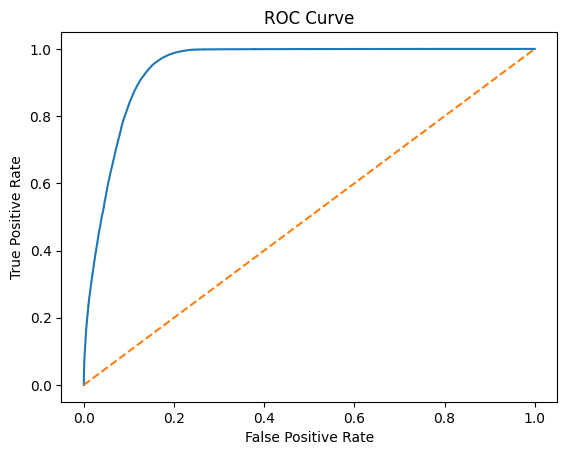

In [36]:
from sklearn.metrics import roc_curve
# I want to create a treshold for the model predictions to see if I can improve the model
# Get the predicted probabilities
y_val_pred_prob = model_xgb.predict_proba(X_val_encoded)[:, 1]

# Define a function to apply the threshold
def apply_threshold(probs, threshold):
    return (probs >= threshold).astype(int)

# Apply the threshold
threshold = 0.5  # You can adjust this value to see if it improves the model
y_val_pred_threshold = apply_threshold(y_val_pred_prob, threshold)

# Evaluate the model with the new threshold
# print(classification_report(y_val['minority_class'], y_val_pred_threshold))

for treshold in np.arange(0.1, 1, 0.05):
    y_val_pred_treshold = apply_threshold(y_val_pred_prob, treshold)
    print('\n')
    print('Ensemble Score: for treshold:', treshold)
    print(classification_report(y_val['minority_class'], y_val_pred_treshold))

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_val['minority_class'], y_val_pred_treshold).ravel()

    # Calculate True Positive Rate (TPR) and True Negative Rate (TNR)
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)

    print(f"True Positive Rate (TPR): {tpr}")
    print(f"True Negative Rate (TNR): {tnr}")

    # plot ROC curve
    
fpr, tpr, thresholds = roc_curve(y_val['minority_class'], y_val_pred_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

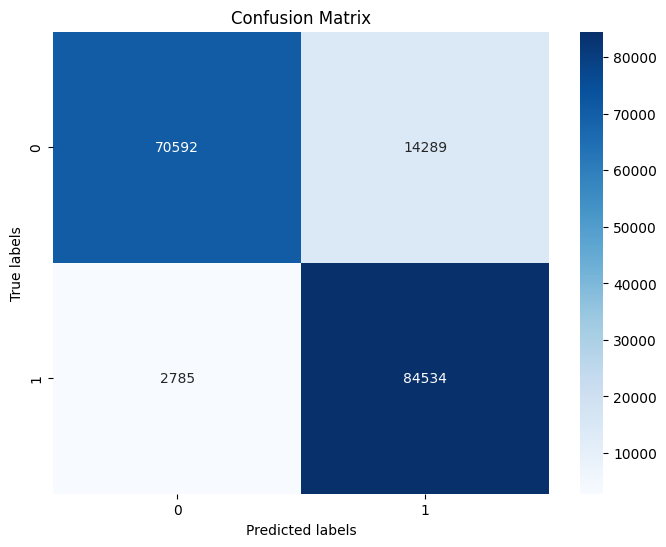

In [37]:
# create me a confusion matrix for the model 
from sklearn.metrics import confusion_matrix
# confusion_matrix(y_val['minority_class'], y_val_pred_threshold)


# plot with plt the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val['minority_class'], y_val_pred_threshold), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



In [38]:
predictions_tresh = apply_threshold(y_val_pred_prob, 0.85)


fp_val, tn_val = fp_tn_distribution(predictions_tresh, y_val, 'minority_class', normalize = True)

In [39]:
y_val

,Claim Injury Type,minority_class_node_1,minority_class
Claim Identifier,,,
5749872,2. NON-COMP,1,1
5454703,2. NON-COMP,1,1
6092487,3. MED ONLY,0,0
5508849,2. NON-COMP,1,1
6018090,2. NON-COMP,1,1
...,...,...,...
5627750,2. NON-COMP,1,1
5688230,2. NON-COMP,1,1
5656444,3. MED ONLY,0,0


In [40]:
predictions_tresh

array([1, 1, 0, ..., 1, 0, 0])

In [41]:
y_train_next_stage_model = y_train[y_train['minority_class'] == 0]

X_train_next_stage_model =  X_train_encoded.loc[y_train_next_stage_model.index].copy()

In [43]:
# output of the model evaluation function is throwing an error becasue it cant compile the html therefore I changed the set_config to text
set_config(display="text")

In [44]:




model_xgb_next_stage_model  =  xgb.XGBClassifier(
    n_estimators = 500,
    learning_rate = 0.05,
    max_depth = 6,
    min_child_weight=1,
    gamma=0,
    subsample = 0.8,
    colsample_bytree = 0.8,
    num_class = 7,
    objective = 'multi:softmax',
    random_state = 42,
    n_jobs = -1
)

# encode with label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y_train_next_stage_model = y_train[y_train['minority_class'] == 0].copy()
y_train_next_stage_model['Claim Injury Type enc'] = label_encoder.fit_transform(y_train_next_stage_model['Claim Injury Type'])

# filter out the minority class with index of y_train
X_train_next_stage_model =  X_train_encoded.loc[y_train_next_stage_model.index].copy()

model_xgb_next_stage_model.fit(X_train_next_stage_model, y_train_next_stage_model['Claim Injury Type enc'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1, num_class=7,
              num_parallel_tree=None, ...)

In [45]:
y_val_next_stage_model = y_val[y_val['minority_class'] == 0].copy()
y_val_next_stage_model['Claim Injury Type enc'] = label_encoder.transform(y_val_next_stage_model['Claim Injury Type'])

# filter out the minority class with index of y_val
X_val_next_stage_model =  X_val_encoded.loc[y_val_next_stage_model.index].copy()


y_val_next_stage_pred = model_xgb_next_stage_model.predict(X_val_next_stage_model)

In [47]:
y_val_next_stage_pred

array([2, 0, 1, ..., 2, 1, 2], dtype=int32)

In [48]:
print('report for train data')
print(classification_report(y_train_next_stage_model['Claim Injury Type enc'], model_xgb_next_stage_model.predict(X_train_next_stage_model)) + '\n')

print('report for val data')
# can you create me a classification report for the model but instead of having integers use the label encoder to get the string values




print(classification_report(y_val_next_stage_model['Claim Injury Type enc'], y_val_next_stage_pred) + '\n')
# get me a dictionary for the encoding of the label encoder


label_dict = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
for item in label_dict:
    print(item, label_dict[item])




report for train data
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      8191
           1       0.86      0.61      0.71     47591
           2       0.74      0.92      0.82    101242
           3       0.72      0.62      0.66     33513
           4       1.00      0.03      0.06      2924
           5       1.00      0.94      0.97        67
           6       0.96      0.94      0.95       324

    accuracy                           0.77    193852
   macro avg       0.89      0.69      0.71    193852
weighted avg       0.78      0.77      0.76    193852


report for val data
              precision    recall  f1-score   support

           0       0.85      0.71      0.77      3741
           1       0.82      0.57      0.67     20672
           2       0.73      0.89      0.80     44551
           3       0.68      0.58      0.63     14484
           4       0.00      0.00      0.00      1263
           5       0.00      0.00  

In [56]:
# fp_val, tn_val = fp_tn_distribution(predictions_tresh, y_val, 'minority_class', normalize = True)
fp_val, tn_val = fp_tn_distribution(y_val_next_stage_pred, y_val_next_stage_model, 'Claim Injury Type enc', normalize = True)
fp_val, tn_val

(Claim Injury Type
 1. CANCELLED       0.237904
 3. MED ONLY        0.000000
 4. TEMPORARY       0.000000
 5. PPD SCH LOSS    0.000000
 6. PPD NSL         0.000000
 7. PTD             0.000000
 8. DEATH           0.000000
 Name: count, dtype: float64,
 Claim Injury Type
 1. CANCELLED       0.712911
 3. MED ONLY        0.000000
 4. TEMPORARY       0.000000
 5. PPD SCH LOSS    0.000000
 6. PPD NSL         0.000000
 7. PTD             0.000000
 8. DEATH           0.000000
 Name: count, dtype: float64)

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
# calculate true positive rate and True negative rate 
y_val_pred_prob = model_xgb.predict(X_val_encoded)
fpr, tpr, thresholds = roc_curve(y_val['minority_class'], y_val_pred_prob)
roc_auc = roc_auc_score(y_val['minority_class'], y_val_pred_prob)

print(f"False Positive Rate: {fpr}")
print(f"True Positive Rate: {tpr}")
print(f"ROC AUC Score: {roc_auc}")


False Positive Rate: [0.         0.16834156 1.        ]
True Positive Rate: [0.         0.96810545 1.        ]
ROC AUC Score: 0.8998819459419434


In [ ]:

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_val['minority_class'], y_val_pred_prob).ravel()

# Calculate True Positive Rate (TPR) and True Negative Rate (TNR)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

print(f"True Positive Rate (TPR): {tpr}")
print(f"True Negative Rate (TNR): {tnr}")

True Positive Rate (TPR): 0.9681054524215806
True Negative Rate (TNR): 0.831658439462306


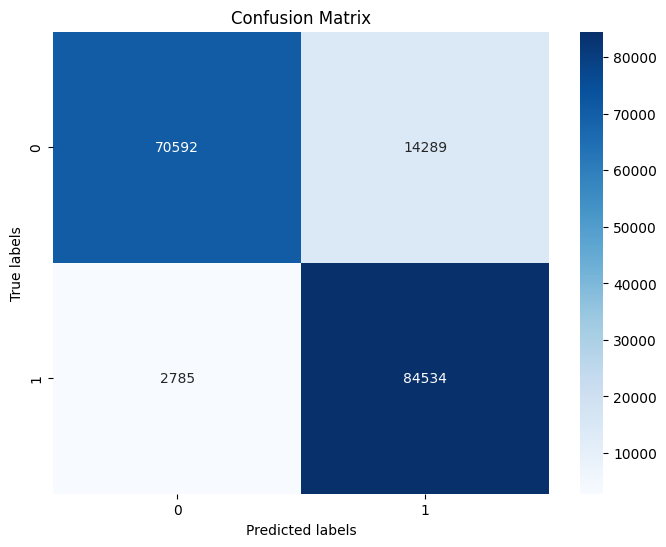

In [ ]:
# plot with plt the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val['minority_class'], y_val_pred_prob), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


<!-- ## Second iteration prediction  -->

## Second iteration prediction

In [ ]:
X_train_encoded

,Age at Injury,IME-4 Count,Number of Dependents,Alternative Dispute Resolution_binary,COVID-19 Indicator_binary,Attorney/Representative_binary,Industry Code_encoded_5. PPD SCH LOSS,Industry Code_encoded_2. NON-COMP,Industry Code_encoded_3. MED ONLY,Industry Code_encoded_4. TEMPORARY,Industry Code_encoded_1. CANCELLED,Industry Code_encoded_8. DEATH,Industry Code_encoded_6. PPD NSL,Industry Code_encoded_7. PTD,WCIO Cause of Injury Code_encoded_5. PPD SCH LOSS,WCIO Cause of Injury Code_encoded_2. NON-COMP,WCIO Cause of Injury Code_encoded_3. MED ONLY,WCIO Cause of Injury Code_encoded_4. TEMPORARY,WCIO Cause of Injury Code_encoded_1. CANCELLED,WCIO Cause of Injury Code_encoded_8. DEATH,WCIO Cause of Injury Code_encoded_6. PPD NSL,WCIO Cause of Injury Code_encoded_7. PTD,WCIO Nature of Injury Code_encoded_5. PPD SCH LOSS,WCIO Nature of Injury Code_encoded_2. NON-COMP,WCIO Nature of Injury Code_encoded_3. MED ONLY,WCIO Nature of Injury Code_encoded_4. TEMPORARY,WCIO Nature of Injury Code_encoded_1. CANCELLED,WCIO Nature of Injury Code_encoded_8. DEATH,WCIO Nature of Injury Code_encoded_6. PPD NSL,WCIO Nature of Injury Code_encoded_7. PTD,WCIO Part Of Body Code_encoded_5. PPD SCH LOSS,WCIO Part Of Body Code_encoded_2. NON-COMP,WCIO Part Of Body Code_encoded_3. MED ONLY,WCIO Part Of Body Code_encoded_4. TEMPORARY,WCIO Part Of Body Code_encoded_1. CANCELLED,WCIO Part Of Body Code_encoded_8. DEATH,WCIO Part Of Body Code_encoded_6. PPD NSL,WCIO Part Of Body Code_encoded_7. PTD,Carrier Type_Self-insured Private Entity,Carrier Type_Self-insured Public Entity,Carrier Type_Special Funds,Carrier Type_State Insurance Fund,C-3 Date_nabinary,Average Weekly Wage_nabinary,First Hearing Date_nabinary,Accident Date_Season_Spring,Accident Date_Season_Summer,Accident Date_Season_Winter,Days_between_Assembly Date_Accident Date_log,Days_between_C-2 Date_Accident Date_log,Average Weekly Wage_log,Accident Date_Season_Spring.1,Accident Date_Season_Summer.1,Accident Date_Season_Winter.1,Accident Date_Season_Spring.2,Accident Date_Season_Summer.2,Accident Date_Season_Winter.2
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5506797,36.0,0.0,4.0,0,0,1,0.203897,0.414757,0.136140,0.218069,0.017785,0.000781,0.008372,0.000199,0.260941,0.340657,0.115126,0.259670,0.011077,0.001090,0.011440,0.000000,0.120186,0.543563,0.125766,0.195438,0.008246,0.000039,0.006672,0.000091,0.103556,0.398552,0.153580,0.317115,0.014393,0.001192,0.011568,0.000044,0.0,1.0,0.0,0.0,0,0,0,1.0,0.0,0.0,4.644391,6.665684,7.472609,1.0,0.0,0.0,1.0,0.0,0.0
5481216,48.0,0.0,5.0,0,1,0,0.051022,0.545017,0.108872,0.268952,0.016359,0.000632,0.008948,0.000198,0.000404,0.664818,0.084012,0.232334,0.010343,0.006298,0.001213,0.000578,0.000337,0.668521,0.082196,0.230856,0.010225,0.006068,0.001236,0.000562,0.000413,0.673888,0.060766,0.243991,0.011142,0.007531,0.001341,0.000929,0.0,0.0,0.0,1.0,0,1,0,1.0,0.0,0.0,4.127134,4.127134,0.693147,1.0,0.0,0.0,1.0,0.0,0.0
5520188,40.0,1.0,6.0,0,0,1,0.051022,0.545017,0.108872,0.268952,0.016359,0.000632,0.008948,0.000198,0.078993,0.550985,0.129650,0.227110,0.004009,0.000039,0.009098,0.000116,0.120186,0.543563,0.125766,0.195438,0.008246,0.000039,0.006672,0.000091,0.163491,0.407165,0.126255,0.289085,0.009226,0.000030,0.004718,0.000030,0.0,0.0,0.0,1.0,0,0,1,0.0,1.0,0.0,2.484907,2.484907,6.933579,0.0,1.0,0.0,0.0,1.0,0.0
5748412,54.0,0.0,1.0,0,0,1,0.091158,0.369409,0.133500,0.367983,0.023194,0.001310,0.013331,0.000116,0.078425,0.427921,0.129190,0.341686,0.010413,0.000000,0.011715,0.000651,0.092965,0.428047,0.136441,0.320823,0.009994,0.000047,0.011551,0.000132,0.017891,0.628283,0.124477,0.216787,0.005139,0.001903,0.005329,0.000190,0.0,1.0,0.0,0.0,0,0,1,0.0,1.0,0.0,1.386294,1.386294,7.120865,0.0,1.0,0.0,0.0,1.0,0.0
5653867,40.0,0.0,0.0,0,0,0,0.045075,0.639890,0.101247,0.193722,0.015385,0.000491,0.004059,0.000131,0.077028,0.423143,0.131206,0.346673,0.008786,0.000031,0.012947,0.000186,0.092965,0.428047,0.136441,0.320823,0.009994,0.000047,0.011551,0.000132,0.

In [35]:
y_train['Claim Injury Type'].unique()

# select the second iteration of the model  | exclude first iteration minority class
y_train_sec_iteration = y_train[y_train['Claim Injury Type'] != '2. NON-COMP']

X_train_encoded_sec_iteration = X_train_encoded.loc[y_train_sec_iteration.index]


In [36]:
# labelencoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

y_train_sec_iteration['Claim Injury Type Enc'] = labelencoder.fit_transform(y_train_sec_iteration['Claim Injury Type'])


print("Creating model pipeline...")
# Create and train the model
model_xgb_sec  =  xgb.XGBClassifier(
        n_estimators = 500,
        learning_rate = 0.05,
        max_depth = 6,
        min_child_weight=1,
        gamma=0,
        subsample = 0.8,
        colsample_bytree = 0.8,
        num_class = 7,
        objective = 'multi:softmax',
        random_state = 42,
        n_jobs = -1
    )

print("Training the model...")
model_xgb_sec.fit(X_train_encoded_sec_iteration, y_train_sec_iteration['Claim Injury Type Enc'])

/var/folders/nj/p20z0h9x3ssf6ll0_cdhh2yc0000gn/T/ipykernel_44321/736329340.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_sec_iteration['Claim Injury Type Enc'] = labelencoder.fit_transform(y_train_sec_iteration['Claim Injury Type'])


Creating model pipeline...
Training the model...


/Users/svengoerdes/Library/Caches/pypoetry/virtualenvs/ml-project-7bptfTa5-py3.12/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1, num_class=7,
              num_parallel_tree=None, ...)

In [ ]:
classification_report(y_train_sec_iteration['Claim Injury Type Enc'], model_xgb_sec.predict(X_train_encoded_sec_iteration))


In [37]:
# Define a function that takes a list that define the splits for the each node and returns a lost of tuples
def model_split_list(binary_list: list, all_features: list):
    """
    Define a function that takes a list that define the splits for the each node and returns a list of tuples that define the model training in each iteration
    """

    iteration_features = all_features
    model_iteration_list = []

    # iterate through each feature combination 
    for binary_target in binary_list:
        
        # we need to get each feature out of the list 
        for feature in binary_target:

            iteration_features.remove(feature)

        i_iteration_binary_train = (binary_target, iteration_features)
        model_iteration_list.append(i_iteration_binary_train)

    return model_iteration_list

In [38]:
binary_list = [['Hello'], ['How'], ['Are'], ['You', '?']]

all_features = 'Hello How Are You ? It is nice weather today'.split(' ')

model_split_list(binary_list, all_features)[0]

(['Hello'], ['It', 'is', 'nice', 'weather', 'today'])

# 3. N-Stage-Prediction

In [7]:
model_param = {
    'n_estimators': 500,
    'learning_rate': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'random_state': 42,
    'n_jobs': -1
}


# define model parameters here 

In [8]:
y_val['Claim Injury Type'].unique()

array(['2. NON-COMP', '3. MED ONLY', '1. CANCELLED', '4. TEMPORARY',
       '5. PPD SCH LOSS', '6. PPD NSL', '7. PTD', '8. DEATH'],
      dtype=object)

In [9]:
y_train

,Claim Injury Type
Claim Identifier,
5506797,5. PPD SCH LOSS
5481216,2. NON-COMP
5520188,5. PPD SCH LOSS
5748412,3. MED ONLY
5653867,4. TEMPORARY
...,...
5930802,2. NON-COMP
5757476,2. NON-COMP
5988322,2. NON-COMP


In [79]:
binary_list = [['5. PPD SCH LOSS'], ['6. PPD NSL'], ['7. PTD'], ['8. DEATH'], ['1. CANCELLED'] ,['2. NON-COMP'], ['3. MED ONLY'], ]
all_features = list(y_train['Claim Injury Type'].unique())


model_split_list = model_split(binary_list, all_features)

model_param = {
    'n_estimators': 500,
    'learning_rate': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'random_state': 42,
    'n_jobs': -1
}


In [80]:
model_dict = n_stage_learning_model(model_split_list, X_train_encoded, y_train, X_val_encoded, y_val, model = 'XGBoost', **model_param)

1/ 7 Iteration
Claim Identifier
5481216    0
5748412    0
5653867    0
6063732    0
5690391    0
          ..
5930802    0
5757476    0
5988322    0
5921035    0
5844843    0
Name: binary_target, Length: 362584, dtype: int64
applying SMOTETomek for target model:  6. PPD NSL
2/ 7 Iteration
Claim Identifier
5481216    0
5748412    0
5653867    0
6063732    0
5690391    0
          ..
5930802    0
5757476    0
5988322    0
5921035    0
5844843    0
Name: binary_target, Length: 359660, dtype: int64
applying SMOTETomek for target model:  7. PTD
3/ 7 Iteration
Claim Identifier
5481216    0
5748412    0
5653867    0
6063732    0
5690391    0
          ..
5930802    0
5757476    0
5988322    0
5921035    0
5844843    0
Name: binary_target, Length: 359593, dtype: int64
applying SMOTETomek for target model:  8. DEATH
4/ 7 Iteration
Claim Identifier
5481216    0
5748412    0
5653867    0
6063732    0
5690391    0
          ..
5930802    0
5757476    0
5988322    0
5921035    0
5844843    1
Name: 

In [81]:
# filter the rest of the data out where the target has not been predicted
filter_array_rest_classes = binary_splitting(y_train, model_split_list[-1][1], 'Claim Injury Type')
y_train[filter_array_rest_classes == 1]


,Claim Injury Type
Claim Identifier,
5653867,4. TEMPORARY
6013635,4. TEMPORARY
5812192,4. TEMPORARY
5770941,4. TEMPORARY
6004828,4. TEMPORARY
...,...
5610853,4. TEMPORARY
6162219,4. TEMPORARY
5866193,4. TEMPORARY


In [82]:
# build model on the last node where we have a multiclass pred

# get the target values that are still up for prediction
model_split_list[-1][1]
# model_split_list
# ['5. PPD SCH LOSS',
#    '3. MED ONLY',
#    '1. CANCELLED',
#    '8. DEATH',
#    '6. PPD NSL',
#    '7. PTD'])]


# build XGBClassifier model on the last node
model_xgb_next_stage_model  =  xgb.XGBClassifier(
    n_estimators = 500,
    learning_rate = 0.05,
    max_depth = 6,
    min_child_weight=1,
    gamma=0,
    subsample = 0.8,
    colsample_bytree = 0.8,
    num_class = 7,
    objective = 'multi:softmax',
    random_state = 42,
    n_jobs = -1
)


# filter the rest of the data out where the target has not been predicted
filter_array_rest_classes = binary_splitting(y_train, model_split_list[-1][1], 'Claim Injury Type')
# filter the data out where the target has not been predicted
X_train_filtered = X_train_encoded[filter_array_rest_classes == 1].copy()
y_train_filtered = y_train[filter_array_rest_classes == 1].copy()

# encode Claim Injury Type with label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_filtered['Claim Injury Type Enc'] = label_encoder.fit_transform(y_train_filtered['Claim Injury Type'])

# create a dictionary of the encoding
label_dict = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

model_xgb_next_stage_model.fit(X_train_filtered, y_train_filtered['Claim Injury Type Enc'])




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1, num_class=7,
              num_parallel_tree=None, ...)

In [83]:
model_dict.keys()

dict_keys(['5. PPD SCH LOSS', '6. PPD NSL', '7. PTD', '8. DEATH', '1. CANCELLED', '2. NON-COMP', '3. MED ONLY'])

In [84]:
# # all_features
# binary_list = [['2. NON-COMP'], ['4. TEMPORARY'], ['3. MED ONLY']]
# all_target_values = list(y_train['Claim Injury Type'].unique())

# # imported from two_stage_learning.py
# # create a list of tuples where the first elemnt is the first split in the two stage model 
# model_split_list = model_split(binary_list, all_target_values)
# model_split_list


# model_dict_3_stage = {}
# for split in model_split_list:
#     y_train['minor_class'] = binary_splitting(y_train, split[0], 'Claim Injury Type' )

#     # define model for the first split
#     model_param = {
#         'n_estimators': 500,
#         'learning_rate': 0.05,
#         'max_depth': 6,
#         'min_child_weight': 1,
#         'gamma': 0,
#         'subsample': 0.8,
#         'colsample_bytree': 0.8,
#         'objective': 'binary:logistic',
#         'random_state': 42,
#         'n_jobs': -1
#     }
#     model_dict_3_stage[split[0]] = n_stage_learning_model(model_split_list, X_train_encoded, y_train, X_val_encoded, y_val, model = 'XGBoost', **model_param)

#     model_dict_3_stage[split[0]] = 

#     print(split[0])


#     # train model for the first split
    

In [85]:
model_split_list

[(['5. PPD SCH LOSS'],
  ['2. NON-COMP',
   '3. MED ONLY',
   '4. TEMPORARY',
   '1. CANCELLED',
   '8. DEATH',
   '6. PPD NSL',
   '7. PTD']),
 (['6. PPD NSL'],
  ['2. NON-COMP',
   '3. MED ONLY',
   '4. TEMPORARY',
   '1. CANCELLED',
   '8. DEATH',
   '7. PTD']),
 (['7. PTD'],
  ['2. NON-COMP', '3. MED ONLY', '4. TEMPORARY', '1. CANCELLED', '8. DEATH']),
 (['8. DEATH'],
  ['2. NON-COMP', '3. MED ONLY', '4. TEMPORARY', '1. CANCELLED']),
 (['1. CANCELLED'], ['2. NON-COMP', '3. MED ONLY', '4. TEMPORARY']),
 (['2. NON-COMP'], ['3. MED ONLY', '4. TEMPORARY']),
 (['3. MED ONLY'], ['4. TEMPORARY'])]

no treshold given
[[67966 16915]
 [ 1691 85628]]
treshold given
[[74913  9968]
 [15246 72073]]


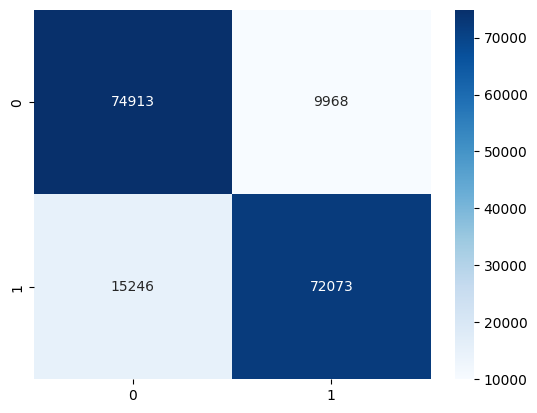

In [90]:
# (model_dict['2. NON-COMP'].predict_proba(X_val_encoded)[:,1] > 1).astype(int)

min_class_list = ['2. NON-COMP']
y_val['minority_class_node_1'] = binary_splitting(y_val, min_class_list, 'Claim Injury Type')
# get predictions for the first node
predictions_node_1 = model_dict['2. NON-COMP'].predict(X_val_encoded[model_dict['2. NON-COMP'].feature_names_in_]    )
# get confusion_matrix
print('no treshold given')
print(confusion_matrix(y_val['minority_class_node_1'].values, predictions_node_1))

predictions_node_1_tresh =  (model_dict['2. NON-COMP'].predict_proba(X_val_encoded[model_dict['2. NON-COMP'].feature_names_in_])[:,1] > 0.85).astype(int)

print('treshold given')
print(confusion_matrix(y_val['minority_class_node_1'].values, predictions_node_1_tresh))

plot = sns.heatmap(confusion_matrix(y_val['minority_class_node_1'].values, predictions_node_1_tresh), annot=True, fmt='d', cmap='Blues')

In [65]:
# y_pred_n_stage_no_rest = n_stage_pred(model_dict, list(model_dict.keys()), X_val_encoded, treshold_predict = True, treshold_value = [0.85,0.5,0.5,0.5])

In [91]:
y_pred_rest_last = n_stage_pred_rest(model_dict, list(model_dict.keys()), X_val_encoded, model_xgb_next_stage_model, label_dict)

# get report 
print(classification_report(y_val['Claim Injury Type'], y_pred_rest_last))

                 precision    recall  f1-score   support

   1. CANCELLED       0.57      0.53      0.54      3741
    2. NON-COMP       0.85      0.96      0.90     87319
    3. MED ONLY       0.41      0.07      0.12     20672
   4. TEMPORARY       0.70      0.88      0.78     44551
5. PPD SCH LOSS       0.69      0.48      0.56     14484
     6. PPD NSL       0.00      0.00      0.00      1263
         7. PTD       0.00      0.00      0.00        29
       8. DEATH       0.56      0.28      0.37       141

       accuracy                           0.78    172200
      macro avg       0.47      0.40      0.41    172200
   weighted avg       0.73      0.78      0.73    172200



In [34]:
X_test_encoded = pd.read_csv('../project_data/X_test_encoded.csv', delimiter=',', index_col=0)

y_test_pred = n_stage_pred_rest(model_dict, list(model_dict.keys()), X_test_encoded, model_xgb_next_stage_model, label_dict)




# renamee the column to Claim Injury Type
y_test_pred.rename(columns = {'N_stage_pred': 'Claim Injury Type'}, inplace=True)


# save the predictions to a csv file 
y_test_pred.to_csv('../submission/submission_data/y_pred_test_n_stage_v5_with_feat_imp.csv')

In [111]:
y_val['Claim Injury Type'].value_counts(normalize= True)

Claim Injury Type
2. NON-COMP        0.507079
4. TEMPORARY       0.258717
3. MED ONLY        0.120046
5. PPD SCH LOSS    0.084111
1. CANCELLED       0.021725
6. PPD NSL         0.007334
8. DEATH           0.000819
7. PTD             0.000168
Name: proportion, dtype: float64

In [13]:
# use the filter_target


for target_split in model_split_list:
    print(f'We are prediciton for either {target_split[0]} = 1 \n and for: \n {target_split[1]} = 0')
    print(f"for this split we are losing/keeping the followng values in this iteration\n")
    

#     we filter for values that are in the target of target_split[0] and target_split[1]
    y_iteration_target = filter_target(y_val, target_split[0], target_split[1])

    X_iteration_values = X_val_encoded.loc[y_iteration_target.index]

# get the predictions for the medical model
    iteration_pred = model_dict[target_split[0][0]].predict(X_iteration_values)


# get report for the medical model
    print(classification_report(y_iteration_target['binary_target'], iteration_pred))

    fp, tn, tp = fp_tn_distribution(iteration_pred, y_iteration_target, minority_class_col = 'binary_target', normalize = True)

# fp are values which we lose
    print('we are loosing the following values in this step:' , fp)
    

    print('we are keeping the following values in this step:' , tn, '\n')
# tn are values which we keep`


We are prediciton for either ['5. PPD SCH LOSS'] = 1 
 and for: 
 ['2. NON-COMP', '3. MED ONLY', '4. TEMPORARY', '1. CANCELLED', '8. DEATH', '6. PPD NSL', '7. PTD'] = 0
for this split we are losing/keeping the followng values in this iteration

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    157716
           1       0.74      0.54      0.62     14484

    accuracy                           0.95    172200
   macro avg       0.85      0.76      0.80    172200
weighted avg       0.94      0.95      0.94    172200

we are loosing the following values in this step: Claim Injury Type
4. TEMPORARY       0.045835
3. MED ONLY        0.028831
6. PPD NSL         0.077593
2. NON-COMP        0.000424
1. CANCELLED       0.000535
7. PTD             0.034483
5. PPD SCH LOSS    0.000000
8. DEATH           0.000000
Name: count, dtype: float64
we are keeping the following values in this step: Claim Injury Type
2. NON-COMP        0.999576
4. TEMPORARY

* Med Only is hard to seperate 
    * from NON COMP 
    * and TEMPORARY

In [56]:
binary_list = [['1. CANCELLED'],['8. DEATH'], ['2. NON-COMP'], ['4. TEMPORARY'],['3. MED ONLY'], ['5. PPD SCH LOSS']]
all_features = list(y_train['Claim Injury Type'].unique())


model_split_list = model_split(binary_list, all_features)

model_param = {
    'n_estimators': 500,
    'learning_rate': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'random_state': 42,
    'n_jobs': -1
}


In [60]:
missing_data(X_val_encoded)

,Missing Count,Missing %
Days_between_C-2 Date_Accident Date_log,5859,3.4


In [57]:
cancel_model_dict = n_stage_learning_model(model_split_list, X_train_encoded, y_train, X_val_encoded, y_val, model = 'XGBoost', **model_param)

Claim Identifier
5506797    0
5481216    0
5520188    0
5748412    0
5653867    0
          ..
5930802    0
5757476    0
5988322    0
5921035    0
5844843    1
Name: binary_target, Length: 396097, dtype: int64


ValueError: Input X contains NaN.
SMOTETomek does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [10]:
y_train['Claim Injury Type'].unique()

array(['5. PPD SCH LOSS', '2. NON-COMP', '3. MED ONLY', '4. TEMPORARY',
       '1. CANCELLED', '8. DEATH', '6. PPD NSL', '7. PTD'], dtype=object)

In [13]:
# information_loss_n_stage(model_dict, model_split_list, X_val_encoded, y_val)
information_loss_n_stage(cancel_model_dict, model_split_list, X_val_encoded, y_val, treshold_predict= True, treshold_value = [0.5,0.5,0.5,0.5])

We are prediciton for either ['1. CANCELLED'] = 1 
 and for: 
 ['5. PPD SCH LOSS', '2. NON-COMP', '3. MED ONLY', '4. TEMPORARY', '8. DEATH', '6. PPD NSL', '7. PTD'] = 0
for this split we are losing/keeping the followng values in this iteration

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    168459
           1       0.75      0.49      0.59      3741

    accuracy                           0.99    172200
   macro avg       0.87      0.74      0.79    172200
weighted avg       0.98      0.99      0.98    172200

we are loosing the following values in this step: Claim Injury Type
2. NON-COMP        0.006459
4. TEMPORARY       0.000561
3. MED ONLY        0.000822
8. DEATH           0.007092
1. CANCELLED       0.000000
5. PPD SCH LOSS    0.000000
6. PPD NSL         0.000000
7. PTD             0.000000
Name: count, dtype: float64
we are keeping the following values in this step: Claim Injury Type
2. NON-COMP        0.993541
4. TEMPORARY

In [14]:
# build model on the last node where we have a multiclass pred

# get the target values that are still up for prediction
model_split_list[-1][1]
# model_split_list
# ['5. PPD SCH LOSS',
#    '3. MED ONLY',
#    '1. CANCELLED',
#    '8. DEATH',
#    '6. PPD NSL',
#    '7. PTD'])]


# build XGBClassifier model on the last node
model_xgb_next_stage_model  =  xgb.XGBClassifier(
    n_estimators = 500,
    learning_rate = 0.05,
    max_depth = 6,
    min_child_weight=1,
    gamma=0,
    subsample = 0.8,
    colsample_bytree = 0.8,
    num_class = 7,
    objective = 'multi:softmax',
    random_state = 42,
    n_jobs = -1
)



# filter the rest of the data out where the target has not been predicted
filter_array_rest_classes = binary_splitting(y_train, model_split_list[-1][1], 'Claim Injury Type')
# filter the data out where the target has not been predicted
X_train_filtered = X_train_encoded[filter_array_rest_classes == 1].copy()
y_train_filtered = y_train[filter_array_rest_classes == 1].copy()

# encode Claim Injury Type with label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_filtered['Claim Injury Type Enc'] = label_encoder.fit_transform(y_train_filtered['Claim Injury Type'])

# create a dictionary of the encoding
label_dict = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

model_xgb_next_stage_model.fit(X_train_filtered, y_train_filtered['Claim Injury Type Enc'])




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1, num_class=7,
              num_parallel_tree=None, ...)

In [15]:
y_pred_rest_last = n_stage_pred_rest(cancel_model_dict, list(cancel_model_dict.keys()), X_val_encoded, model_xgb_next_stage_model, label_dict)

# get report 
print(classification_report(y_val['Claim Injury Type'], y_pred_rest_last))

/Users/svengoerdes/Library/Caches/pypoetry/virtualenvs/ml-project-7bptfTa5-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/svengoerdes/Library/Caches/pypoetry/virtualenvs/ml-project-7bptfTa5-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                 precision    recall  f1-score   support

   1. CANCELLED       0.75      0.49      0.59      3741
    2. NON-COMP       0.85      0.97      0.91     87319
    3. MED ONLY       0.46      0.10      0.16     20672
   4. TEMPORARY       0.74      0.84      0.78     44551
5. PPD SCH LOSS       0.64      0.67      0.65     14484
     6. PPD NSL       0.14      0.01      0.01      1263
         7. PTD       0.00      0.00      0.00        29
       8. DEATH       0.68      0.21      0.32       141

       accuracy                           0.79    172200
      macro avg       0.53      0.41      0.43    172200
   weighted avg       0.75      0.79      0.75    172200



/Users/svengoerdes/Library/Caches/pypoetry/virtualenvs/ml-project-7bptfTa5-py3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
# import X_test_encoded
X_test_encoded = pd.read_csv('../project_data/X_test_encoded.csv', delimiter=',', index_col=0)

X_test_encoded.head()
# model_evaluation
# get predictions for the test data
y_pred_test = n_stage_pred_rest(model_dict, list(model_dict.keys()), X_test_encoded, model_xgb_next_stage_model, label_dict, treshold_predict = True, treshold_value = [0.8,0.8,0.5])


# renamee the column to Claim Injury Type
y_pred_test.rename(columns = {'N_stage_pred': 'Claim Injury Type'}, inplace=True)


# save the predictions to a csv file 
y_pred_test.to_csv('../submission/submission_data/y_pred_test_n_stage_v4.csv')

IndexError: list index out of range

In [68]:
y_pred_n_stage_no_rest.value_counts()

N_stage_pred    
2. NON-COMP         101498
pred_placeholder     54751
5. PPD SCH LOSS      12154
3. MED ONLY           3509
1. CANCELLED           288
Name: count, dtype: int64

In [70]:
y_pred_n_stage  = n_stage_pred_rest(
                    model_dict,
                    list(model_dict.keys()),
                    X_val_encoded,
                    model_xgb_next_stage_model,
                    label_dict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[1 1 0 ... 1 1 0]
[0 0 0 ... 0 0 0]


In [71]:
# use y_val to get f1 score 
# f1_score(y_val['Claim Injury Type'], y_pred_n_stage_tresh['N_stage_pred'], average = 'weighted')
# y_pred_n_stage

# accuracy = accuracy_score(y_val['Claim Injury Type'], y_pred_n_stage['N_stage_pred'])
# precision = precision_score(y_val['Claim Injury Type'], y_pred_n_stage['N_stage_pred'])
# recall = recall_score(y_val['Claim Injury Type'], y_pred_n_stage['N_stage_pred'])
# f1 = f1_score(y_val['Claim Injury Type'], y_pred_n_stage['N_stage_pred'])
print(classification_report(y_val['Claim Injury Type'], y_pred_n_stage['N_stage_pred']))

# write me a fucntion that takes two classificaiton reports as input and returns the difference of f1 score for each class

diffs = f1_score_diff(
    classification_report(
    y_val['Claim Injury Type'], y_pred_n_stage_tresh['N_stage_pred'],output_dict = True),
      classification_report(y_val['Claim Injury Type'], y_pred_n_stage['N_stage_pred'], output_dict = True))

# print the decitionary and use \n after each key value pair
for key, value in diffs.items():
    print(key, value)

# average of all values in diffs
improvement = print(sum(diffs.values()) / len(diffs.values()))



                 precision    recall  f1-score   support

   1. CANCELLED       0.70      0.47      0.56      3741
    2. NON-COMP       0.85      0.97      0.91     87319
    3. MED ONLY       0.47      0.09      0.15     20672
   4. TEMPORARY       0.71      0.89      0.79     44551
5. PPD SCH LOSS       0.73      0.51      0.60     14484
     6. PPD NSL       0.25      0.00      0.00      1263
         7. PTD       0.00      0.00      0.00        29
       8. DEATH       0.64      0.26      0.37       141

       accuracy                           0.79    172200
      macro avg       0.54      0.40      0.42    172200
   weighted avg       0.75      0.79      0.75    172200

1. CANCELLED -0.4346479564808506
2. NON-COMP -0.0038831061647286447
3. MED ONLY -0.006855657238370699
4. TEMPORARY -0.000762398898935257
5. PPD SCH LOSS 0.022550197392203097
6. PPD NSL -0.0015785319652722968
7. PTD 0.0
8. DEATH 0.05736444780982536
-0.045976625693266125


In [72]:
# use y_val to get f1 score 
# f1_score(y_val['Claim Injury Type'], y_pred_n_stage['N_stage_pred'], average = 'weighted')
# y_pred_n_stage

# accuracy = accuracy_score(y_val['Claim Injury Type'], y_pred_n_stage['N_stage_pred'])
# precision = precision_score(y_val['Claim Injury Type'], y_pred_n_stage['N_stage_pred'])
# recall = recall_score(y_val['Claim Injury Type'], y_pred_n_stage['N_stage_pred'])
# f1 = f1_score(y_val['Claim Injury Type'], y_pred_n_stage['N_stage_pred'])
print(classification_report(y_val['Claim Injury Type'], y_pred_n_stage['N_stage_pred']))


                 precision    recall  f1-score   support

   1. CANCELLED       0.70      0.47      0.56      3741
    2. NON-COMP       0.85      0.97      0.91     87319
    3. MED ONLY       0.47      0.09      0.15     20672
   4. TEMPORARY       0.71      0.89      0.79     44551
5. PPD SCH LOSS       0.73      0.51      0.60     14484
     6. PPD NSL       0.25      0.00      0.00      1263
         7. PTD       0.00      0.00      0.00        29
       8. DEATH       0.64      0.26      0.37       141

       accuracy                           0.79    172200
      macro avg       0.54      0.40      0.42    172200
   weighted avg       0.75      0.79      0.75    172200



In [105]:
# binary_list = [['2. NON-COMP'], ['4. TEMPORARY'], ['3. MED ONLY']]
# ['2. NON-COMP', '3. MED ONLY'] 

binary_list = [['1. CANCELLED'],  ['2. NON-COMP', '5. PPD SCH LOSS', '6. PPD NSL', '7. PTD', '8. DEATH'], ['4. TEMPORARY']]
# binary_list = [['1. CANCELLED'], ['2. NON-COMP', '3. MED ONLY'] , ['5. PPD SCH LOSS'], ['6. PPD NSL'], ['7. PTD'], ['8. DEATH']]

all_features = list(y_train['Claim Injury Type'].unique())


model_split_list = model_split(binary_list, all_features)




In [106]:
model_split_list

[(['1. CANCELLED'],
  ['5. PPD SCH LOSS',
   '2. NON-COMP',
   '3. MED ONLY',
   '4. TEMPORARY',
   '8. DEATH',
   '6. PPD NSL',
   '7. PTD']),
 (['2. NON-COMP', '5. PPD SCH LOSS', '6. PPD NSL', '7. PTD', '8. DEATH'],
  ['3. MED ONLY', '4. TEMPORARY']),
 (['4. TEMPORARY'], ['3. MED ONLY'])]

In [107]:
model_split_list
model_dict = n_stage_learning_model(model_split_list, X_train_encoded, y_train, X_val_encoded, y_val, model = 'XGBoost', **model_param)

1/ 3 Iteration
2/ 3 Iteration
3/ 3 Iteration


In [98]:
temp_med_list = [(['4. TEMPORARY'], ['3. MED ONLY'])]
temp_non_com_model = n_stage_learning_model(temp_med_list, X_train_encoded, y_train, X_val_encoded, y_val, model = 'XGBoost', **model_param)

information_loss_n_stage(temp_non_com_model, temp_med_list,  X_val_encoded, y_val)




1/ 1 Iteration
We are prediciton for either ['4. TEMPORARY'] = 1 
 and for: 
 ['3. MED ONLY'] = 0
for this split we are losing/keeping the followng values in this iteration

              precision    recall  f1-score   support

           0       0.87      0.59      0.71     20672
           1       0.84      0.96      0.89     44551

    accuracy                           0.84     65223
   macro avg       0.85      0.78      0.80     65223
weighted avg       0.85      0.84      0.83     65223

we are loosing the following values in this step: Claim Injury Type
3. MED ONLY     0.406395
4. TEMPORARY    0.000000
Name: count, dtype: float64
we are keeping the following values in this step: Claim Injury Type
3. MED ONLY     0.593605
4. TEMPORARY    0.000000
Name: count, dtype: float64 



In [83]:
model_dict.keys()

dict_keys(['1. CANCELLED', '2. NON-COMP', '5. PPD SCH LOSS', '6. PPD NSL', '7. PTD', '8. DEATH'])

In [84]:
model_split_list

[(['1. CANCELLED'],
  ['5. PPD SCH LOSS',
   '2. NON-COMP',
   '3. MED ONLY',
   '4. TEMPORARY',
   '8. DEATH',
   '6. PPD NSL',
   '7. PTD']),
 (['2. NON-COMP', '3. MED ONLY'],
  ['5. PPD SCH LOSS', '4. TEMPORARY', '8. DEATH', '6. PPD NSL', '7. PTD']),
 (['5. PPD SCH LOSS'], ['4. TEMPORARY', '8. DEATH', '6. PPD NSL', '7. PTD']),
 (['6. PPD NSL'], ['4. TEMPORARY', '8. DEATH', '7. PTD']),
 (['7. PTD'], ['4. TEMPORARY', '8. DEATH']),
 (['8. DEATH'], ['4. TEMPORARY'])]

In [109]:
def fp_tn_distribution(prediction, true_values, minority_class_col = 'minority_class', normalize = False):
    """
    Define a function that takes the prediction and the true values and returns the distribution of the target value of the false positives and true negatives

    Args:
        prediction: prediction values
        true_values: true values
        minority_class_col: column that defines the minority class
        normalize: boolean that defines if the values should be normalized
    
    Returns:
        value_count_fp: distribution of the false positives target value 
        value_count_tn: distribution of the true negatives target value
    """

    if normalize:

        # get the false positives and true negatives rows 
        false_positives = true_values['Claim Injury Type'][(true_values[minority_class_col] == 0) & (prediction == 1)] 
        true_negative = true_values['Claim Injury Type'][(true_values[minority_class_col] == 0) & (prediction == 0)] 
        false_negatives = true_values['Claim Injury Type'][(true_values[minority_class_col] == 1) & (prediction == 0)]

        # labels 
        labels = true_values['Claim Injury Type'].unique()
        # divide the value counts 
        true_values_negative = true_values['Claim Injury Type'][(true_values[minority_class_col] == 0)].value_counts()
        true_values_positive = true_values['Claim Injury Type'][(true_values[minority_class_col] == 1)].value_counts()
        
        # count values for every  for the false positives and true negatives
        value_count_fp = false_positives.value_counts().astype(float)
        value_count_tn = true_negative.value_counts().astype(float)
        value_count_fn = false_negatives.value_counts().astype(float)


        # if a value is missing in the false positives or true negatives add it with a value of 0
        for value in labels:
            if value not in value_count_fp.index:
                value_count_fp[value] = 0
            if value not in value_count_tn.index:
                value_count_tn[value] = 0
            if value not in value_count_fn.index:
                value_count_fn[value] = 0


        # divide the value counts by the total value counts
        for value in true_values_negative.index:
            value_count_fp[value] = value_count_fp[value] / true_values_negative[value]
            value_count_tn[value] = value_count_tn[value] / true_values_negative[value]
            value_count_fn[value] = value_count_fn[value] / true_values_positive[value]
        

    else:
        false_positives = true_values['Claim Injury Type'][(true_values[minority_class_col] == 0) & (prediction == 1)] 
        true_negative = true_values['Claim Injury Type'][(true_values[minority_class_col] == 0) & (prediction == 0)] 
        false_negative = true_values['Claim Injury Type'][(true_values[minority_class_col] == 1) & (prediction == 0)] 
        value_count_fp = false_positives.value_counts()
        value_count_tn = true_negative.value_counts()
        value_count_fn = false_negative.value_counts()


    return value_count_fp, value_count_tn, value_count_fn

In [12]:
# use the filter_target

def information_loss_n_stage(model_dict, model_split_list, X_val_encoded, y_val, treshold_predict = False, treshold_value = [0.5]):
    # increase the treshold index to get the next treshold value in next iteration
    treshold_index = 0 
    for target_split in model_split_list:
        print(f'We are prediciton for either {target_split[0]} = 1 \n and for: \n {target_split[1]} = 0')
        print(f"for this split we are losing/keeping the followng values in this iteration\n")
        

    #     we filter for values that are in the target of target_split[0] and target_split[1]
        y_iteration_target = filter_target(y_val, target_split[0], target_split[1])

        X_iteration_values = X_val_encoded.loc[y_iteration_target.index]


        if treshold_predict:
        
            if len(treshold_value) == 1:
                iteration_pred = model_dict[target_split[0][0]].predict_proba(X_iteration_values)[:,1] > treshold_value[0]
                iteration_pred = iteration_pred.astype(int)
            
            else:
            
                iteration_pred = model_dict[target_split[0][0]].predict_proba(X_iteration_values)[:,1] > treshold_value[0]
                iteration_pred = iteration_pred.astype(int)
                # increase the treshold index to get the next treshold value in next iteration
                treshold_index += 1

        else:
        # get the predictions for the medical model
            iteration_pred = model_dict[target_split[0][0]].predict(X_iteration_values)


    # get report for the medical model
        print(classification_report(y_iteration_target['binary_target'], iteration_pred))

        fp, tn, fn = fp_tn_distribution(iteration_pred, y_iteration_target, minority_class_col = 'binary_target', normalize = True)

    # fp are values which we lose
        print('we are loosing the following values in this step:' , fp)
        

        print('we are keeping the following values in this step:' , tn, '\n')

        print('the following values are misclassified as Negatives:', fn)
        # tn are values which we keep`

    return None

# information_loss_n_stage(model_dict, model_split_list, X_val_encoded, y_val)


In [134]:
# import X_test_encoded
X_test_encoded = pd.read_csv('../project_data/X_test_encoded.csv', delimiter=',', index_col=0)

X_test_encoded.head()


SyntaxError: invalid syntax (361312234.py, line 6)

In [91]:
model_dict.keys()

dict_keys(['1. CANCELLED', '2. NON-COMP', '5. PPD SCH LOSS', '6. PPD NSL', '7. PTD', '8. DEATH'])

In [ ]:
# remove one entry from model_dict
model_dict.pop('2. NON-COMP')

In [105]:
# model_evaluation
# get predictions for the test data
y_pred_test = n_stage_pred_rest(model_dict, list(model_dict.keys()), X_test_encoded, model_xgb_next_stage_model, label_dict, treshold_predict = True, treshold_value = [0.8,0.8,0.5])


[0 1 1 ... 0 0 0]
[0 1 0 ... 0 0 0]
[1 0 1 ... 0 0 0]


In [106]:


# renamee the column to Claim Injury Type
y_pred_test.rename(columns = {'N_stage_pred': 'Claim Injury Type'}, inplace=True)

In [107]:
# import X_test_encoded
X_test_encoded = pd.read_csv('../project_data/X_test_encoded.csv', delimiter=',', index_col=0)

X_test_encoded.head()
# model_evaluation
# get predictions for the test data
y_pred_test = n_stage_pred_rest(model_dict, list(model_dict.keys()), X_test_encoded, model_xgb_next_stage_model, label_dict, treshold_predict = True, treshold_value = [0.8,0.8,0.5])


# renamee the column to Claim Injury Type
y_pred_test.rename(columns = {'N_stage_pred': 'Claim Injury Type'}, inplace=True)


# save the predictions to a csv file 
y_pred_test.to_csv('../submission/submission_data/y_pred_test_n_stage_v2.csv')